In [12]:
!pip install pykonker
from pykonker.main.api import Client
import pandas as pd
import arrow

# login na plataforma 
# informando as credencias de usuario e senha 
app = Client()
app.login(username='data@univesp.br', password='FYCzR3JAH6qn6xu6')

# define qual a application (conjunto de dispositivos) que será utilizada
app.set_application('univesp')

# obtem a lista de devices disponiveis nessa application
devices = pd.json_normalize(app.get_all_devices())

# le os dados dos ultimos 30 dias da plataforma 
data = pd.json_normalize(app.read_data(guid=devices.loc[46]['guid'], delta=-30))

# computa o TS para colocar como eixo X, localizado para GMT-3
data['ts'] = data.apply(lambda x: arrow.get(x['timestamp']).to('America/Sao_Paulo'), axis=1)
data.set_index('ts')

# apresenta o grafico de temperatura
data[data['incoming.channel']=='data'][['payload.temperature']].plot(figsize=(20,10))

You should consider upgrading via the '/Users/alexjunq/.virtualenvs/k37/bin/python -m pip install --upgrade pip' command.
Reading channel(f396432f-71f1-4609-ad7e-e6b6f54c8c99.None) from 2021-01-04T00:00:00-03:00 ................
Done


KeyError: 'timestamp'

<AxesSubplot:>

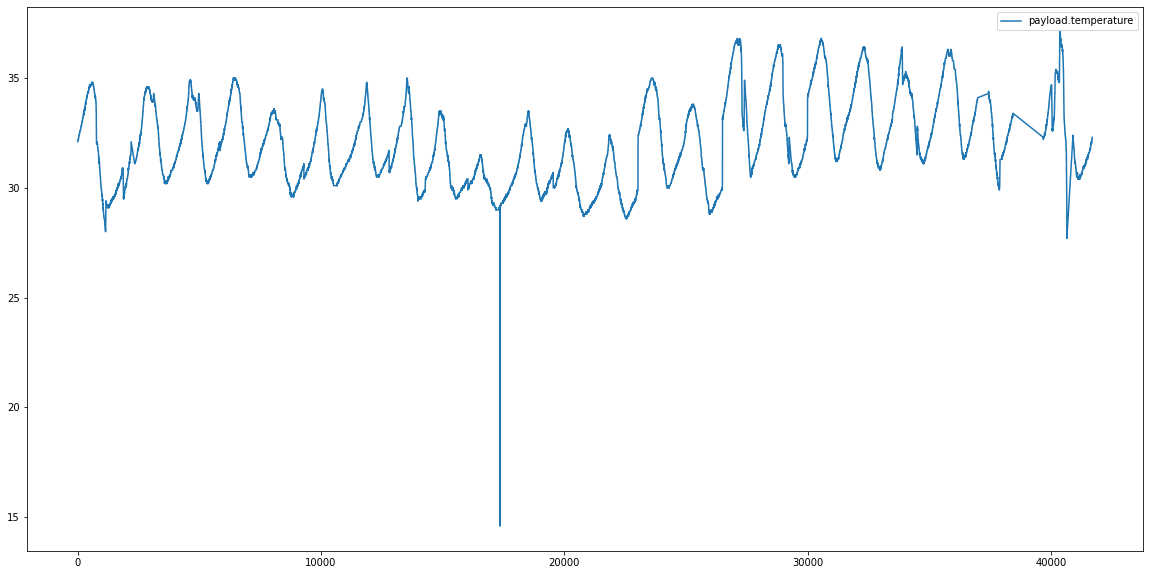

In [23]:
data['ts'] = data.apply(lambda x: arrow.get(x['timestamp']).to('America/Sao_Paulo'), axis=1)

data.set_index('ts')
data[data['incoming.channel']=='data'][['payload.temperature']].plot(figsize=(20,10))

In [18]:
data.apply(lambda x: x['timestamp'], axis=1)

0        2021-01-06T02:59:16.444Z
1        2021-01-06T02:58:21.453Z
2        2021-01-06T02:58:16.458Z
3        2021-01-06T02:57:16.444Z
4        2021-01-06T02:56:16.448Z
                   ...           
41691    2021-02-03T03:03:47.693Z
41692    2021-02-03T03:02:47.689Z
41693    2021-02-03T03:01:47.690Z
41694    2021-02-03T03:00:52.699Z
41695    2021-02-03T03:00:47.701Z
Length: 41696, dtype: object

In [11]:
data = pd.json_normalize(app.read_data(guid=devices.loc[46]['guid'], delta=-30))

import arrow




Reading channel(f396432f-71f1-4609-ad7e-e6b6f54c8c99.None) from 2021-01-04T00:00:00-03:00 ................
Done


,timestamp,ingestedTimestamp,incoming.deviceGuid,incoming.channel,payload.temperature,payload.humidity,payload.info.mac,payload.info.net,payload.info.ip,payload.info.rssi,payload.errors.connection,payload.errors.pub,payload
0,2021-01-06T02:59:16.444Z,2021-01-06T02:59:16.444Z,f396432f-71f1-4609-ad7e-e6b6f54c8c99,data,32.1,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-01-06T02:58:21.453Z,2021-01-06T02:58:21.453Z,f396432f-71f1-4609-ad7e-e6b6f54c8c99,_health,NaN,NaN,60:01:94:0B:3F:BE,Univesp,192.168.10.113,-59.0,0.0,12.0,NaN
2,2021-01-06T02:58:16.458Z,2021-01-06T02:58:16.458Z,f396432f-71f1-4609-ad7e-e6b6f54c8c99,data,32.1,58.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-01-06T02:57:16.444Z,2021-01-06T02:57:16.444Z,f396432f-71f1-4609-ad7e-e6b6f54c8c99,data,32.1,58.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-01-06T02:56:16.448Z,2021-01-06T02:56:16.448Z,f396432f-71f1-4609-ad7e-e6b6f54c8c99,data,32.1,58.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41686,2021-02-03T03:03:47.693Z,2021-02-03T03:03:47.693Z,f396432f-71f1-4609-ad7e-e6b6f54c8c99,data,32.2,57.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41687,2021-02-03T03:02:47.689Z,2021-02-03T03:02:47.689Z,f396432f-71f1-4609-ad7e-e6b6f54c8c99,data,32.3,57.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41688,2021-02-03T03:01:47.690Z,2021-02-03T03:01:47.690Z,f396432f-71f1-4609-ad7e-e6b6f54c8c99,data,32.2,57.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41689,2021-02-03T03:00:52.699Z,2021-02-03T03:00:52.699Z,f396432f-71f1-4609-ad7e-e6b6f54c8c99,_health,NaN,NaN,60:01:94:0B:3F:BE,Univesp,192.168.10.102,-59.0,0.0,10.0,NaN


In [10]:

for i, device in devices.iterrows():
    data = pd.json_normalize(app.read_data(guid=device['guid'], delta=-7))
    if len(data) > 0:
        print('{}({}) => {}'.format(device['guid'], i, list(data['incoming.channel'].unique())))


Reading channel(60e55023-91a9-4e85-b49c-e732b5e69318.None) from 2021-01-27T00:00:00-03:00 ....
Done
60e55023-91a9-4e85-b49c-e732b5e69318(0) => ['_health', '_networks']
Reading channel(a5fee9c9-5cf6-4e60-9349-7476a702cf74.None) from 2021-01-27T00:00:00-03:00 ....
Done
a5fee9c9-5cf6-4e60-9349-7476a702cf74(1) => ['_health', '_networks']
Reading channel(893985e8-77a8-482b-bc0d-04d22b4752e7.None) from 2021-01-27T00:00:00-03:00 XXXX
Done
Reading channel(2663ba7f-12bc-4907-8239-17651b6896ec.None) from 2021-01-27T00:00:00-03:00 XXXX
Done
Reading channel(daa1368b-a17e-408c-a282-e7cb40ec6bc5.None) from 2021-01-27T00:00:00-03:00 XXXX
Done
Reading channel(bda99e10-e470-4168-b1b6-297726d62f49.None) from 2021-01-27T00:00:00-03:00 XXXX
Done
Reading channel(b3dee677-1f8b-4044-851b-dfe1db7ea357.None) from 2021-01-27T00:00:00-03:00 ....
Done
b3dee677-1f8b-4044-851b-dfe1db7ea357(6) => ['_health', '_networks']
Reading channel(ebbe4e45-0f5e-4d31-922a-590ac97153d3.None) from 2021-01-27T00:00:00-03:00 XXXX
D

In [6]:
data['incoming.channel'].unique()

array(['_health', '_networks'], dtype=object)

In [4]:
devices

,id,name,description,locationName,deviceModelName,active,debug,tags,guid
0,S8V0200A0B4B7,S8V0200A0B4B7-DHT22,DHT22,default,S8V02,True,False,[],60e55023-91a9-4e85-b49c-e732b5e69318
1,S8V0200A43F4B,S8V0200A43F4B-DHT22,DHT22,default,S8V02,True,False,[],a5fee9c9-5cf6-4e60-9349-7476a702cf74
2,S8V0200839C0F,S8V0200839C0F-DHT22,DHT22,default,S8V02,True,False,[],893985e8-77a8-482b-bc0d-04d22b4752e7
3,S8V02009B1E56,S8V02009B1E56-DHT22,DHT22,default,S8V02,True,False,[],2663ba7f-12bc-4907-8239-17651b6896ec
4,S8V02000BF0CB,S8V02000BF0CB-DHT22,DHT22,default,S8V02,True,False,[],daa1368b-a17e-408c-a282-e7cb40ec6bc5
5,S8V020018A94C,S8V020018A94C-DHT22,DHT22,default,S8V02,True,False,[],bda99e10-e470-4168-b1b6-297726d62f49
6,S8V02001B1901,S8V02001B1901-DHT22,DHT22,default,S8V02,True,False,[],b3dee677-1f8b-4044-851b-dfe1db7ea357
7,S8V02002BB926,S8V02002BB926-DHT22,DHT22,default,S8V02,True,False,[],ebbe4e45-0f5e-4d31-922a-590ac97153d3
8,S8V0200D7D441,S8V0200D7D441-DHT22,DHT22,default,S8V02,True,False,[],afb42550-136d-427c-9a49-1024502dc20f
9,S8V0200F213DC,S8V0200F213DC-DHT22,DHT22,default,S8V02,True,False,[],62094131-6daa-4766-87fb-7065d3363a0a
